<a href="https://colab.research.google.com/github/minjaekim070/Bootcamp_Project/blob/main/%EA%B0%90%EC%A0%95%EB%B6%84%EC%84%9D%EB%AA%A8%EB%8D%B8_tflite%EB%B3%80%ED%99%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import model_from_json
import numpy as np
import cv2
import argparse
import os
class FacialExpressionModel(object):
    EMOTIONS_LIST = ["angry", "disgust", "fear", "happy", "sad", "surprise", "neutral"]

    def __init__(self, model_json_file, model_weights_file):
        with open(model_json_file, "r") as json_file:
            loaded_model_json = json_file.read()
            self.loaded_model = model_from_json(loaded_model_json)

        self.loaded_model.load_weights(model_weights_file)
        print("Model loaded from disk")
        self.loaded_model.summary()

    def predict_emotion(self, img):
      self.preds = self.loaded_model.predict(img)

      # EMOTIONS_LIST에 있는 레이블과 예측 결과를 딕셔너리로 생성
      emotion_dict = {emotion: round(score, 3) for emotion, score in zip(self.EMOTIONS_LIST, self.preds[0])}

      # 각각의 감정에 해당하는 확률 값을 따로 모으는 딕셔너리
      emotions_by_type = {
          'happy': [],
          'sad': [],
          'surprise': [],
          'neutral': [],
      }

      emotion_by_type = {
      'happy': emotion_dict['happy'],
      'sad': emotion_dict['sad'] + emotion_dict['disgust'],
      'neutral': emotion_dict['neutral']  + emotion_dict['angry'] + emotion_dict['fear'],
      'surprise': emotion_dict['surprise']
       }

      return emotion_by_type

# Provide the paths to the model JSON file and model weights file
model_json = '/content/drive/MyDrive/감정분석 모델/model.json'
model_weights = '/content/drive/MyDrive/감정분석 모델/weights.h5'

# Load the model
model = FacialExpressionModel(model_json, model_weights)

#모델 작동

In [ ]:
# 모델의 입력 shape과 출력 shape 확인
input_shape = model.loaded_model.input_shape
output_shape = model.loaded_model.output_shape
print("Input shape:", input_shape)
print("Output shape:", output_shape)

Input shape: (None, 48, 48, 1)
Output shape: (None, 7)


In [ ]:
!pip install fer

In [ ]:
from fer import FER
import os
import sys
import pandas as pd
import cv2
import numpy as np
import os
import glob

In [ ]:
folder_path = '/content/drive/MyDrive/운전자 이상탐지/Training/original/bus/R_001_60_M'
extensions = ['jpg']

photo_list = []
for ext in extensions:
    photo_list.extend(glob.glob(os.path.join(folder_path, f'*.{ext}')))

In [ ]:
from google.colab.patches import cv2_imshow
image = '/content/drive/MyDrive/운전자 이상탐지/Training/original/bus/R_001_60_M/R_001_60_M_01_M0_G0_C0_05.jpg'
image = cv2.imread(image)
cv2_imshow(image)

In [ ]:
detector = FER()
detector.detect_emotions(image)

[{'box': array([181, 601, 357, 357], dtype=int32),
  'emotions': {'angry': 0.07,
   'disgust': 0.01,
   'fear': 0.09,
   'happy': 0.04,
   'sad': 0.51,
   'surprise': 0.05,
   'neutral': 0.24}}]

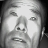

In [ ]:
# 이미지 축소
resized_image = cv2.resize(image, (48,48))

#bounding_box
x,y,w,h = 219, 628, 302, 302  #bounding box 값 가변
resized_image = image[y:y+h,x:x+w]
resized_image = cv2.resize(resized_image, (48,48))
cv2_imshow(resized_image)

In [ ]:
# 이미지를 흑백 이미지로 변환
gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
input_data = gray_image[np.newaxis, :, :, np.newaxis]
print(input_data.shape)

(1, 48, 48, 1)


In [ ]:
model.predict_emotion(input_data)

1/1 [==============================] - 0s 177ms/step


{'happy': 0.006, 'sad': 0.142, 'neutral': 0.731, 'surprise': 0.121}

#tflite 파일 변환

In [ ]:
import tensorflow as tf
from keras.models import model_from_json
import numpy as np

# Convert Keras model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model.loaded_model)
tflite_model = converter.convert()

# Save the TensorFlow Lite model to a file
tflite_model_path = '/content/drive/MyDrive/감정분석 모델/model.tflite'
with open(tflite_model_path, 'wb') as f:
    f.write(tflite_model)

print("TensorFlow Lite model saved to", tflite_model_path)

TensorFlow Lite model saved to /content/drive/MyDrive/감정분석 모델/model.tflite
